In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#to split the train test data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [7]:
import io
dataset = pd.read_csv('crop_production.csv')

In [8]:
dataset.head()

,month,day,sunlight_radiation_watt,temperature_C,humidity,electrical conductivity_ph,rainfall_ml/hr,fog,pests,leaf conditions
0,Jun,1,1.27,37,48,7.0,7.4,1.0,1,1.0
1,NaN,2,1.27,30,52,6.5,16.7,0.0,1,0.0
2,NaN,3,1.29,27,58,7.1,14.9,0.0,1,1.0
3,NaN,4,1.25,35,58,7.2,24.7,1.0,0,1.0
4,NaN,5,1.30,40,59,6.8,21.4,0.0,0,1.0


In [9]:
dataset.describe()

,day,sunlight_radiation_watt,temperature_C,humidity,electrical conductivity_ph,rainfall_ml/hr,fog,pests,leaf conditions
count,180.000000,178.000000,180.000000,180.000000,180.000000,180.000000,179.000000,180.000000,177.000000
mean,15.500000,1.252360,30.200000,61.922222,6.728889,17.027222,0.703911,0.255556,0.915254
std,8.679585,0.048643,5.162607,14.763860,0.417292,10.386959,0.457811,0.437390,0.279293
min,1.000000,1.190000,24.000000,45.000000,6.000000,4.600000,0.000000,0.000000,0.000000
25%,8.000000,1.210000,26.000000,52.000000,6.500000,7.600000,0.000000,0.000000,1.000000
50%,15.500000,1.250000,29.000000,58.000000,6.700000,16.700000,1.000000,0.000000,1.000000
75%,23.000000,1.285000,35.000000,59.000000,6.800000,21.400000,1.000000,1.000000,1.000000
max,30.000000,1.360000,41.000000,95.000000,7.500000,48.800000,1.000000,1.000000,1.000000


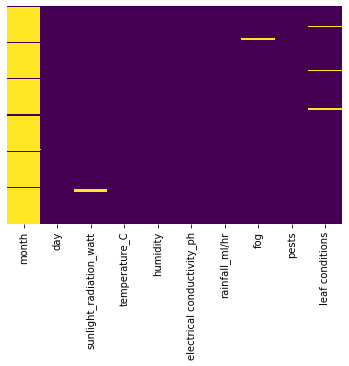

In [10]:
import seaborn as sns
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
dataset.isna().any()

month                          True
day                           False
sunlight_radiation_watt        True
temperature_C                 False
humidity                      False
electrical conductivity_ph    False
rainfall_ml/hr                False
fog                            True
pests                         False
leaf conditions                True
dtype: bool

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028C60E45128>,
      dtype=object)

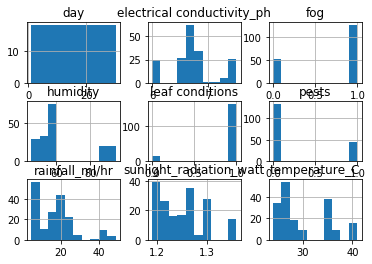

In [12]:
dataset.hist()

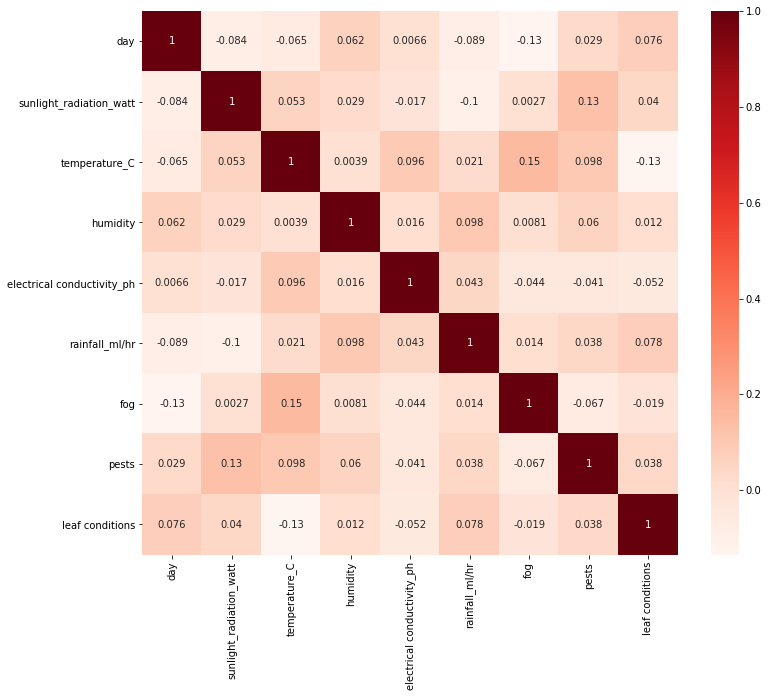

In [13]:
#get the correlation
plt.figure(figsize=(12,10))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

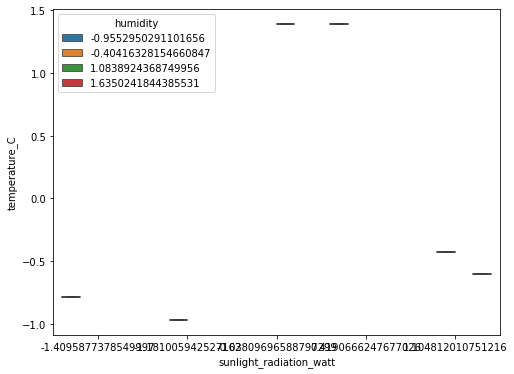

In [57]:
sns.boxplot(x='sunlight_radiation_watt', y='temperature_C', data=dataset, hue='humidity')

In [14]:
cor_target = abs(cor["fog"])
relevant_features = cor_target
relevant_features

day                           0.129337
sunlight_radiation_watt       0.002731
temperature_C                 0.150119
humidity                      0.008146
electrical conductivity_ph    0.044333
rainfall_ml/hr                0.014338
fog                           1.000000
pests                         0.066647
leaf conditions               0.019259
Name: fog, dtype: float64

Text(0.5, 1.0, 'Count of each Target Class')

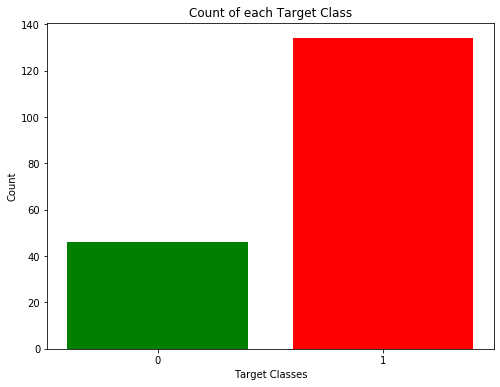

In [16]:
#Lets take a look at the target class distribution
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['pests'].unique(), dataset['pests'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')
#the target class is not all balanced, at the end we will try to use XGBoost as see the change in accuracy 

In [22]:
dataset.dropna(how='any', inplace=True)

In [23]:
standardScaler = StandardScaler()
columns_to_scale = ['day', 'sunlight_radiation_watt', 'temperature_C', 'humidity', 'electrical conductivity_ph', 'rainfall_ml/hr'] 
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [43]:
# fog 
y = dataset['fog']
X = dataset.drop(['fog',"month",'day', 'sunlight_radiation_watt', 'temperature_C', 'humidity', 'electrical conductivity_ph', 'rainfall_ml/hr'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [44]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
#create an instance and fit the model 
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
#predictions
Predictions = logmodel.predict(X_test)

In [46]:
#classification report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,Predictions))
print(confusion_matrix(y_test, Predictions))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

[[0 1]
 [0 1]]


In [51]:
# pest
y = dataset['pests']
X = dataset.drop(['pests',"month",'day', 'sunlight_radiation_watt', 'temperature_C', 'humidity', 'electrical conductivity_ph', 'rainfall_ml/hr'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [52]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
#create an instance and fit the model 
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
#predictions
Predictions = logmodel.predict(X_test)

In [54]:
#classification report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,Predictions))
print(confusion_matrix(y_test, Predictions))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

[[1 0]
 [1 0]]


In [55]:
# leaf conditions
y = dataset['leaf conditions']
X = dataset.drop(['leaf conditions',"month",'day', 'sunlight_radiation_watt', 'temperature_C', 'humidity', 'electrical conductivity_ph', 'rainfall_ml/hr'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
#create an instance and fit the model 
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

In [ ]:
#predictions
Predictions = logmodel.predict(X_test)

In [56]:
#classification report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,Predictions))
print(confusion_matrix(y_test, Predictions))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       0.0
         1.0       0.00      0.00      0.00       2.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

[[0 0]
 [2 0]]


In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Predictions)
np.set_printoptions(precision=2)
plt.figure()


<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

In [35]:
pip install scikit-plotlogmodel.score(X_test, y_test)

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


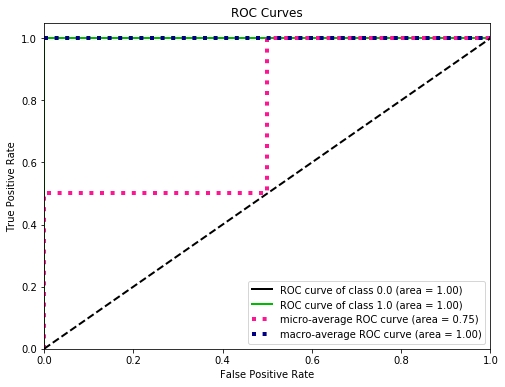

In [36]:

import scikitplot as skplt #to make things easy
y_pred_proba = logmodel.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred_proba)
plt.show()

In [37]:
logmodel.score(X_test, y_test)

0.5

In [40]:
logmodel.score(X_test, y_test)

0.5

In [41]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(X_train, y_train)
#model.score(X_test,y_test)
#predictions
Predictions = model.predict(X_test)
#print(classification_report(y_test,Predictions))
#print(confusion_matrix(y_test, Predictions))

ModuleNotFoundError: No module named 'xgboost'

In [39]:
y_pred_proba = model.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred_proba)
plt.show()

NameError: name 'model' is not defined